## Twitter Sentimental Analysis 

We would be analaysing how 1,000 random Nigerians feel about the commercial banks and digital banks they use.

### Workflow 

* Create Twitter Developer account 
* Scrape the data from Twitter 
* Clean tweets 
* Analyze the Data 
* Data Visualizaton 
* Hypothesis 


In [ ]:
! pip install tweepy

In [ ]:
!pip install textblob

In [ ]:
!pip install WordCloud

In [ ]:
!pip install nltk

In [ ]:
!pip install vaderSentiment

In [47]:
#import dependencies 
import tweepy
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from textblob import TextBlob 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.style.use("fivethirtyeight")

In [48]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordLemm = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to C:\Users\TOYIN
[nltk_data]     OLAPE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\TOYIN
[nltk_data]     OLAPE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [50]:
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer

In [51]:
#Access Twitter API  

key  =  "MfWW96NNbgC2BP9gYvW0xNf3z"
secret = "et5tSv0hq1xQbcZwgqgA7tQSK2xnvvPcFoU9ofihqf98cvyy7u"

access_token = "366459074-DYjx7MdizB10YVQuxIVwBRniKvcASx6EKMZogHn6"
access_token_secret = "j50GFMWpvpvGInQudjRMm6mAnM6Unm7gBjlWpov99Tq01"


In [52]:
#Authenticate Twitter dev. access token
auth = tweepy.OAuthHandler(key, secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

## Scope of Project
General Sentimental Analysis of Commercial Banks and Digital Banks in Nigeria. An indepth analysis on the 5 biggest Commercial Banks in Nigeria. 


### Building Functions 

In [80]:
#Since i am going to parse for several banks. I will go aheadd and change the above code to a function
def parse_tweet(keyword):
    listname = []

    for tweet in tweepy.Cursor(api.search, q= keyword + '-filter:retweets', language = "en",tweet_mode='extended',geocode ='10,7,1000mi' ).items(1500):
        listname.append(tweet.full_text)
    df = pd.DataFrame(listname, columns=['Tweets'])
    df.drop_duplicates(inplace = True)
    print(df.shape, df.head())
    return df['Tweets']
     

We can see that we have so much useless data to remove it 

we need to clean the data

for cleaning we are going to use `re` (regex) 

process : 
    1. Lower Casing: Each text is converted to lowercase.
    2. Replacing URLs: Links starting with "http" or "https" or "www" are replaced by "URL".
    3. Replacing Emojis: Replace emojis by using a pre-defined dictionary containing emojis along with their meaning. (eg: ":)" to "EMOJIsmile")
    4. Replacing Usernames: Replace @Usernames with word "USER". (eg: "@Kaggle" to "USER")
    5. Removing Non-Alphabets: [^a-zA-z]
    6. Removing Consecutive letters: 3 or more consecutive letters are replaced by 2 letters. (eg: "Heyyyy" to "Heyy")
    7. Removing Short Words: Words with length less than 2 are removed.
    8. Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
    9. Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “Great” to “Good”)

In [81]:
EMOJIS = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
URLPATTERN        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
USERPATTERN       = '@[^\s]+'
SEQPATTERN   = r"(.)\1\1+"
SEQREPLACE = r"\1\1"

In [82]:
#Similarly, i will make the cleaning function in order to cleaning the other data sets 
import time
def clean_tweets(listname):
    
    t = time.time()
    corpus = []
    for texts in listname:
        ## lower casing
        text = texts.lower()
        ### Replacing URL
        text = re.sub(URLPATTERN,'',text)
        ### Replacing EMOJI
        for emoji in EMOJIS.keys():
            text = text.replace(emoji, "EMOJI" + EMOJIS[emoji])  
        ### Replacing USER pattern
        text = re.sub(USERPATTERN,'',text)
        ### Removing non-alphabets
        text = re.sub('[^a-zA-z]'," ",text)
        ### Removing consecutive letters
        text = re.sub(SEQPATTERN,SEQREPLACE,text)
        text = text.split()
        text = [wordLemm.lemmatize(word) for word in text if not word in stopwords.words('english') and len(word) > 1]
        text = ' '.join(text)
        corpus.append(text)
    return corpus
    print(f'Time Taken: {round(time.time()-t)} seconds')

In [83]:
#Appliyng Countvectorizer

def model(corpus):
    CV = CountVectorizer(max_features=3000,ngram_range=(1,2))
    countVector = CV.fit_transform(corpus)
    df = pd.DataFrame(countVector.toarray(), columns=CV.get_feature_names())

    return df

In [84]:
#Transform Dataframe
def transform(df):
    count = pd.DataFrame(df.sum())
    df = count.sort_values(0,ascending=False)

    return df

In [85]:
def textcloud(corpus):
    text = " ".join(vals for vals in corpus)
# Create and generate a word cloud image:
    wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [131]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

def get_sentiment(corpus):
    noOfTweet = 1
    positive = 0
    negative = 0
    neutral = 0
    polarity = 0
    tweet_list = []
    neutral_list = []
    negative_list = []
    positive_list = []
    for tweet in corpus:
        noOfTweet += 1
        #print(tweet.text)
        tweet_list.append(tweet)
        analysis = TextBlob(tweet)
        score = analyser().polarity_scores(tweet)
        neg = score['neg']
        neu = score["neu"]
        pos = score["pos"]
        comp = score['compound']
        polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet)
        negative += 1
        
    elif pos > neg:
        positive_list.append(tweet)
        positive += 1

    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1
    
    positive = percentage(positive, noOfTweet)
    negative = percentage(negative, noOfTweet)
    neutral = percentage(neutral, noOfTweet)
    polarity = percentage(polarity, noOfTweet)
    positive = format(positive, '.1f')
    negative = format(negative, '.1f')
    neutral = format(neutral, '.1f')
    return polarity, positive, negative, neutral
 

## KUDA BANK 

In [87]:
#Parse twitter for Kuda bank tweets 
kuda_list = parse_tweet("kudabank")

(1401, 1)                                               Tweets
0  @kudabank Please retweet and place your order ...
1  @kudabank KUDA ooo u people are not activating...
2  @kudabank I'm still waiting. It's been over 24...
3  @jasminee_cr Give your wrist, bracelets while ...
4  @streetchurchh Give your wrist, bracelets whil...


In [88]:
kuda_corpus = clean_tweets(kuda_list)
kuda_corpus[2]

'still waiting hour'

In [89]:
kuda_cv = model(kuda_corpus)
kuda_cv.head()

,abeg,abi,able,abortive,abortive contacted,abuja,abujatwittercommunity,accepted,access,access bank,...,yes oo,yesterday,yesterday pm,yet,yet debited,yet get,yet receive,yorubanation,zenith,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
kuda_trans = transform(kuda_cv)
kuda_trans.head(3)

,0
bracelet,582
bank,463
kuda,446


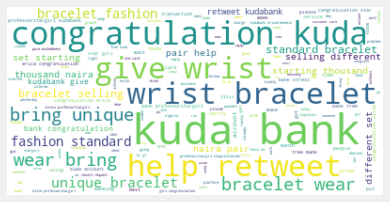

In [91]:
textcloud(kuda_corpus)

In [132]:
kuda_sent = get_sentiment(kuda_corpus)
kuda_sent

(10.7417543969345, '0.0', '0.0', '0.1')

In [94]:
#Store in folder
wordcloud.to_file("img/review1.png")
kuda_trans.to_csv('kuda.csv')

## GTB Bank 

In [95]:
gtb_list = parse_tweet("gtb")

(1448, 1)                                               Tweets
0  @_Ewawunmi @Kynsofficial Sir @Kynsofficial ple...
1  @Mbahdeyforyou @babamechanic 0457106301\nGtb\n...
2  Lmaoo I have 3 accounts with Union Bank, 2 wit...
3  @Mbahdeyforyou @babamechanic 0555301260 GTB ht...
4  @Mbahdeyforyou @babamechanic 0265739308 GTB ht...


In [96]:
gtb_corpus = clean_tweets(gtb_list)

In [97]:
gtb_corpus[2]

'lmaoo account union bank gtb access bank'

In [98]:
gtb_cv = model(gtb_corpus)
gtb_cv.head()

,abayomi,abdullah,abdullah mustapha,abeg,abeg bless,abeg gtb,abeg help,abel,abi,abi gtb,...,young,young nigerian,yusuf,yusuf jimoh,zaddy,zainab,zenith,zenith access,zenith bank,zenith gtb
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
gtb_trans = transform(gtb_cv)
gtb_trans.head()

,0
gtb,1458
bank,261
bless,181
god,175
account,150


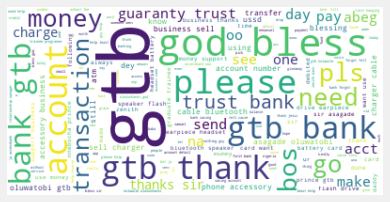

In [100]:
textcloud(gtb_corpus)

In [133]:
gtb_sent = get_sentiment(gtb_corpus)
gtb_sent

(6.103815314736646, '0.1', '0.0', '0.0')

In [102]:
#Store in folder
wordcloud.to_file("img/review2.png")
gtb_trans.to_csv('gtb.csv')

## First Bank 

In [103]:
#Parse twitter for Kuda bank tweets 
fb_list = parse_tweet("firstbank")

(512, 1)                                               Tweets
0  @_Ewawunmi @Kynsofficial 3126993582\nEttah Eza...
1  @FBN_help should I get @cenbank and @zigzagdre...
2  Try out the new FirstMobile App from FirstBank...
3  firstbank you really are getting worst nowaday...
4  If firstbank isn’t the most unreliable bank ev...


In [104]:
fb_corpus = clean_tweets(fb_list)
fb_corpus[2]

'try new firstmobile app firstbank'

In [105]:
fb_cv = model(fb_corpus)
fb_cv.head()

,abandoned,abeg,abeokuta,abeokuta constitute,abi,abuja,abundantly,acc,acceptance,acceptance old,...,zaddy ettah,zazafamily,zenith,zenith firstbank,zenith gtb,zenith said,zenithbank,zenithbank firstbank,zeya,zeya happy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
fb_trans = transform(fb_cv)
fb_trans.head(3)

,0
firstbank,503
account,93
first,65


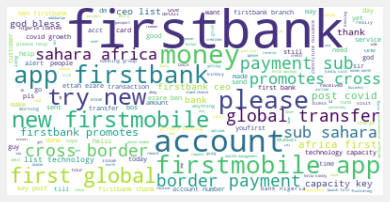

In [107]:
textcloud(fb_corpus)

In [134]:
fb_sent = get_sentiment(fb_corpus)
fb_sent

(8.925557264373067, '0.2', '0.0', '0.0')

In [109]:
#Store in folder
wordcloud.to_file("img/review3.png")
fb_trans.to_csv('fb.csv')

## Zenith Bank

In [110]:
#Parse twitter for Kuda bank tweets 
zb_list = parse_tweet("zenithbank")

(1461, 1)                                               Tweets
0  15 contestants came for audition... 10 contest...
1                   Please check your DM @ZenithBank
2  @ZenithBank Please Zenith return my money sinc...
3  @ZenithBank @ZenithBank I received a debit of ...
4  @boss_nathan Please be informed that card quar...


In [111]:
zb_corpus = clean_tweets(zb_list)
zb_corpus[2]

'please zenith return money since credit interest card'

In [112]:
zb_cv = model(zb_corpus)
zb_cv.head()

,__,abeg,abeg leave,abeg oh,abi,able,abujatwittercommunity,access,access bank,accessing,...,zenithbank giveittomechallenge,zenithbankghana,zenithbankghana eazybanking,zenithbetalifepromo,zenithbetalifepromo zenithbank,zenithdirect,zenithdirect due,zenithdirect enable,zenithreversal,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
zb_trans = transform(zb_cv)
zb_trans.head(3)

,0
kindly,345
please,325
account,306


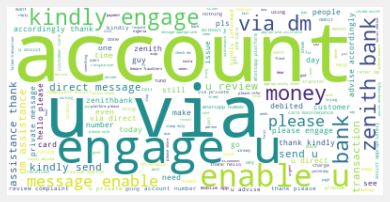

In [114]:
textcloud(zb_corpus)

In [135]:
zb_sent = get_sentiment(zb_corpus)
zb_sent

(11.662157414329023, '0.0', '0.1', '0.0')

In [116]:
#Store in folder
wordcloud.to_file("img/review4.png")
zb_trans.to_csv('zb.csv')

## United Bank of Africa

In [117]:
#Parse twitter for Kuda bank tweets 
uba_list = parse_tweet("UBA")

(1443, 1)                                               Tweets
0  @Mbahdeyforyou @babamechanic 2142213780\nUBA ❤...
1  @Mbahdeyforyou @babamechanic Done boss\n\n2141...
2  @Mbahdeyforyou @babamechanic 2185412630\n\nUba...
3  @Mbahdeyforyou @babamechanic 2124302961 UBA ht...
4  @Mbahdeyforyou @babamechanic 2048439918 UBA no...


In [118]:
uba_corpus = clean_tweets(uba_list)
uba_corpus[2]

'uba'

In [119]:
uba_cv = model(uba_corpus)
uba_cv.head()

,abayomi,abdullahi,abdulshakur,abdulshakur yakubu,abeg,abeg make,abeg uba,abi,able,abraham,...,yunno,yup,yup watching,zabanin,zenith,zenith bank,zenith fcmb,zero,zoom,zoom registration
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
uba_trans = transform(uba_cv)
uba_trans.head(3)

,0
uba,1141
bank,225
uba bank,134


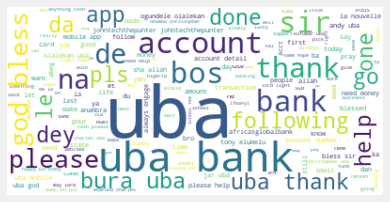

In [121]:
textcloud(uba_corpus)

In [136]:
uba_sent = get_sentiment(uba_corpus)
uba_sent

(5.59838647905649, '0.0', '0.0', '0.1')

In [123]:
#Store in folder
wordcloud.to_file("img/review5.png")
uba_trans.to_csv('uba.csv')

## Access Bank

In [124]:
#Parse twitter for Kuda bank tweets 
ab_list = parse_tweet("accessbank")

(1460, 1)                                               Tweets
0  @PeaceJones8 Hi @PeaceJones8, we apologize for...
1  @adelere_michael Hi @adelere_michael, we apolo...
2  @nkayvida Hello nkayvida Thank you for reachin...
3  Another 500 making 1k5 \n@accessbank_help refu...
4  @sizzle314 Hi @sizzle314, we are responding to...


In [125]:
ab_corpus = clean_tweets(ab_list)
ab_corpus[2]

'hello nkayvida thank reaching love look kindly dm account number help ^okhai'

In [126]:
ab_cv = model(ab_corpus)
ab_cv.head()

,__ganny,abc,abc branch,abeg,abi,abiodun,able,absolute,absolute emergency,acc,...,yst made,yusufmu,yusufmu kindly,zarahs_closet,zarahs_closet responded,zenith,zenith bank,zenith po,zinotech,zinotech deeply
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
ab_trans = transform(ab_cv)
ab_trans.head(3)

,0
dm,697
please,526
check,326


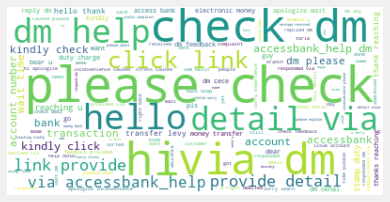

In [128]:
textcloud(ab_corpus)

In [137]:
ab_sent = get_sentiment(ab_corpus)
ab_sent

(8.34665486141355, '0.1', '0.0', '0.0')

In [130]:
#Store in folder
wordcloud.to_file("img/review6.png")
ab_trans.to_csv('ab.csv')

## Assumptions & Challenges 

The data collected for first bank would also be quite messy, because the word "first" can be found with other banks and therefore it means there would be  lot of noise in the data set collected for First bank. 

Collecting the data for Kuda Bank at this time is heavily influenece by the fact that they just recieved a Series A funding of $25 million, Majority of the tweets containing this keyword would be congratolatory and therefore Positive 

Nigeria is currently the poverty capital of the world and as such most of the tweets are of people posting their account number in order to recieve funds from kind strangers.This is evident in the wordcloud where we can see words like "bless", "abeg", "please"etc.


## Further Work 

Traingulate the tweets according to there locations to better understand the areas with negative tweets in order to improve bank services and improve the overall positive sentiment. 

Filter out give away tweets to reduce the noise, Identify all twitter stopwords like "dm", ""etc. and remove when cleaning tweets